In [91]:
def linear_interpolation(xs, ys, x):
    
    x_i = min([d for d in xs if d > x])
    x_i_minus_1 = xs[np.where(xs == x_i)[0][0] - 1]
    y_i = ys[np.where(xs == x_i)[0][0]]
    y_i_minus_1 = ys[np.where(xs == x_i_minus_1)[0][0]]
    
    x_border = (min(xs) - min(xs) / 30, max(xs) + max(xs) / 30)
    y_border = (min(ys) - min(ys) / 30, max(ys) + max(ys) / 30)
    
    plot_x = np.array(np.arange(x_i_minus_1, x_i, step = 0.001))
    
    a_i = (y_i - y_i_minus_1) / (x_i - x_i_minus_1)
    b_i = y_i_minus_1 - a_i * x_i_minus_1
    
    y_x = a_i * x + b_i
    
    plt.figure(figsize=(20, 10))
    plt.plot(xs, ys, 'ro',
            plot_x, [a_i * x + b_i for x in plot_x], '--',
            x, y_x, 'yo')
    plt.vlines(x, y_border[0], y_x, linestyle="dashed")
    plt.hlines(y_x, x_border[0], x, linestyle="dashed")
    
    ax = plt.gca()
    ax.set_autoscale_on(False)
    ax.axis([x_border[0], x_border[1], y_border[0], y_border[1]])

    plt.grid()
    plt.show()
    
    return round(y_x, 4)

def square_interpolation(xs, ys, x):
    x_i = min([d for d in xs if d > x])
    x_i_minus_1 = xs[np.where(xs == x_i)[0][0] - 1]
    x_i_plus_1 = xs[np.where(xs == x_i)[0][0] + 1]
    
    y_i = ys[np.where(xs == x_i)[0][0]]
    y_i_minus_1 = ys[np.where(xs == x_i_minus_1)[0][0]]
    y_i_plus_1 = ys[np.where(xs == x_i_plus_1)[0][0]]
    
    plot_x = np.array(np.arange(x_i_minus_1, x_i_plus_1, step = 0.0001))
    x_border = (min(xs) - min(xs) / 30, max(xs) + max(xs) / 30)
    y_border = (min(ys) - min(ys) / 30, max(ys) + max(ys) / 30)
    
    c = np.linalg.solve(
        [
            [x_i_minus_1**2, x_i_minus_1, 1],
            [x_i**2, x_i, 1],
            [x_i_plus_1**2, x_i_plus_1, 1]
        ],
        [y_i_minus_1, y_i, y_i_plus_1]
    )
    
    y_x = c[0] * x**2 + c[1] * x + c[2]
    
    plt.figure(figsize=(20, 10))
    plt.plot(xs, ys, 'ro',
            plot_x, [c[0] * x**2 + c[1] * x + c[2] for x in plot_x], '--',
            x, y_x, 'yo')
    plt.vlines(x, y_border[0], y_x, linestyle="dashed")
    plt.hlines(y_x, x_border[0], x, linestyle="dashed")
    
    ax = plt.gca()
    ax.set_autoscale_on(False)
    ax.axis([x_border[0], x_border[1], y_border[0], y_border[1]])

    plt.grid()
    plt.show()
    
    return round(y_x, 4)

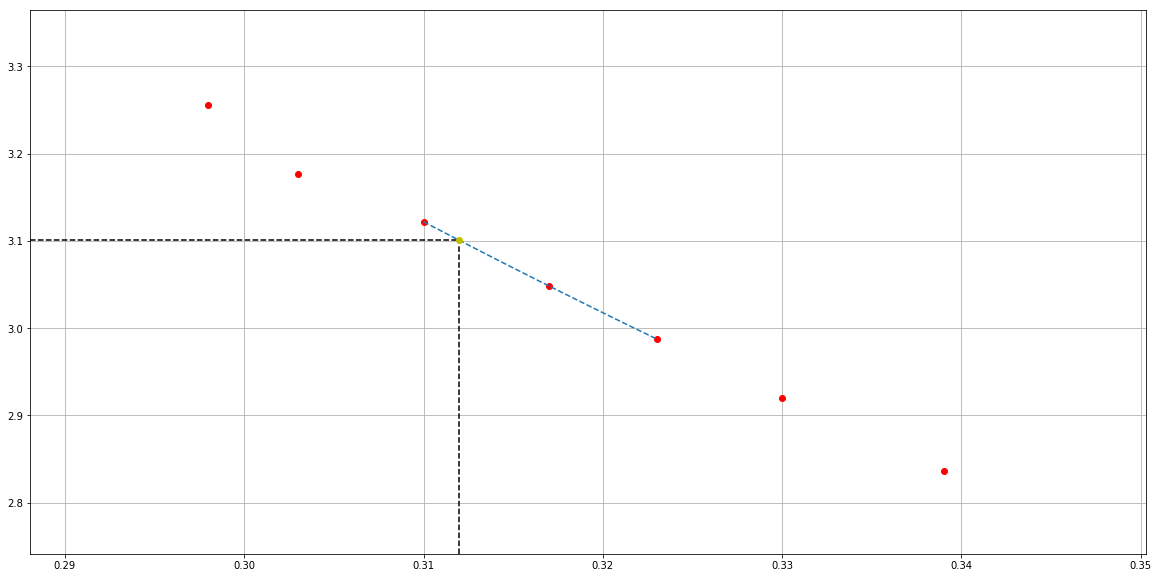

3.1005


In [94]:
import matplotlib.pyplot as plt
import numpy as np

xs1 = np.array([0.298, 0.303, 0.310, 0.317, 0.323, 0.330, 0.339])
ys1 = np.array([3.2557, 3.1764, 3.1218, 3.0482, 2.9875, 2.9195, 2.8359])

print(square_interpolation(xs1, ys1, 0.312))